In [138]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

In [139]:
data = pd.read_csv('Pre_processed_data.csv')
data.head()

,Unnamed: 0,Cpu Count,Cpu Working Time,Cpu idle Time,cpu_percent,Usage Cpu Count,number of software interrupts since boot,number of system calls since boot,number of interrupts since boot,cpu avg load over 1 min,...,number of bytes received,number of packets sent,number of packets recived,total number of errors while receiving,total number of errors while sending,total number of incoming packets which were dropped,total number of outgoing packets which were dropped,Dates,Time,Boot_Time
0,0,4,3733.17,120971.88,31.8,4,20838767,0,200273168,0.14,...,140071937,239706,432121,0,1,3,0,2019-05-14,20:00:51,8.53
1,1,4,3767.15,121920.71,33.3,4,21030713,0,202313416,0.80,...,140425748,240251,433093,0,1,3,0,2019-05-14,20:05:04,8.57
2,2,4,3769.52,121938.45,23.8,4,21038802,0,202404974,0.73,...,140430950,240269,433117,0,1,3,0,2019-05-14,20:05:09,8.57
3,3,4,3773.42,121984.77,25.0,4,21054241,0,202500215,0.69,...,140438873,240294,433158,0,1,3,0,2019-05-14,20:05:22,8.58
4,4,4,3778.91,122102.01,25.0,4,21078850,0,202692540,0.47,...,140451107,240349,433242,0,1,3,0,2019-05-14,20:05:53,8.58


In [140]:
data.shape, data.dtypes
data.columns

Index(['Unnamed: 0', 'Cpu Count', 'Cpu Working Time', 'Cpu idle Time',
       'cpu_percent', 'Usage Cpu Count ',
       'number of software interrupts since boot',
       'number of system calls since boot', 'number of interrupts since boot',
       'cpu avg load over 1 min', 'cpu avg load over 5 min',
       'cpu avg load over 15 min', 'system_total_memory', 'system_used_memory',
       'system_free_memory', 'system_active_memory', 'system_inactive_memory',
       'system_buffers_memory', 'system_cached_memory', 'system_shared_memory',
       'system_avalible_memory', 'disk_total_memory', 'disk_used_memory',
       'disk_free_memory', 'disk_read_count', 'disk_write_count',
       'disk_read_bytes', 'disk_write_bytes', 'time spent reading from disk',
       'time spent writing to disk', 'time spent doing actual I/Os',
       'number of bytes sent', 'number of bytes received',
       'number of packets sent', 'number of packets recived',
       'total number of errors while receiving',


In [141]:
data.drop(columns=['Unnamed: 0',
                   'Cpu Count'
                   ,'Usage Cpu Count '
                   ,'number of system calls since boot'                   
                   ,'total number of outgoing packets which were dropped'
                   ,'total number of errors while receiving'
                   ,'Dates', 'Time'
                   ],inplace=True)
X = np.array(data)

In [142]:
data.nunique()

Cpu Working Time                                       4085
Cpu idle Time                                          4224
cpu_percent                                             114
number of software interrupts since boot               4225
number of interrupts since boot                        4225
cpu avg load over 1 min                                 159
cpu avg load over 5 min                                 145
cpu avg load over 15 min                                129
system_total_memory                                      23
system_used_memory                                     3781
system_free_memory                                     4046
system_active_memory                                   4058
system_inactive_memory                                 2030
system_buffers_memory                                  3981
system_cached_memory                                   2630
system_shared_memory                                    647
system_avalible_memory                  

In [143]:
# corr = data.corr()
# sns.heatmap(corr, square=True)

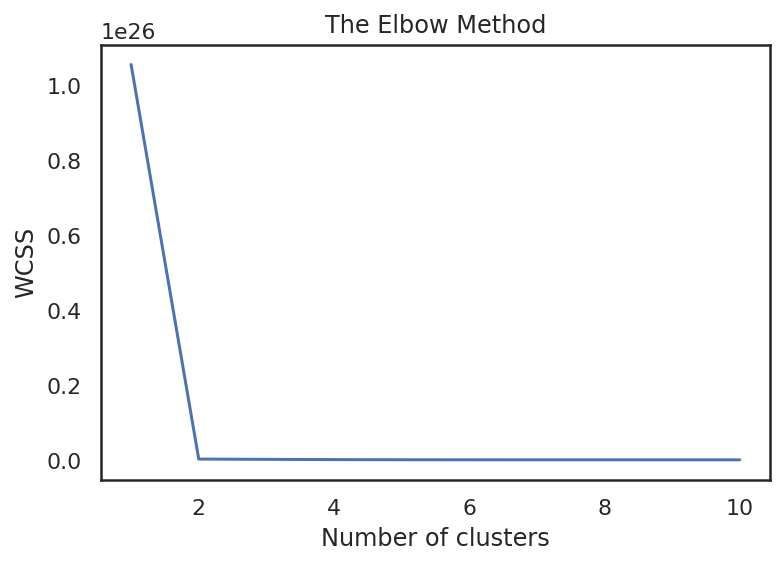

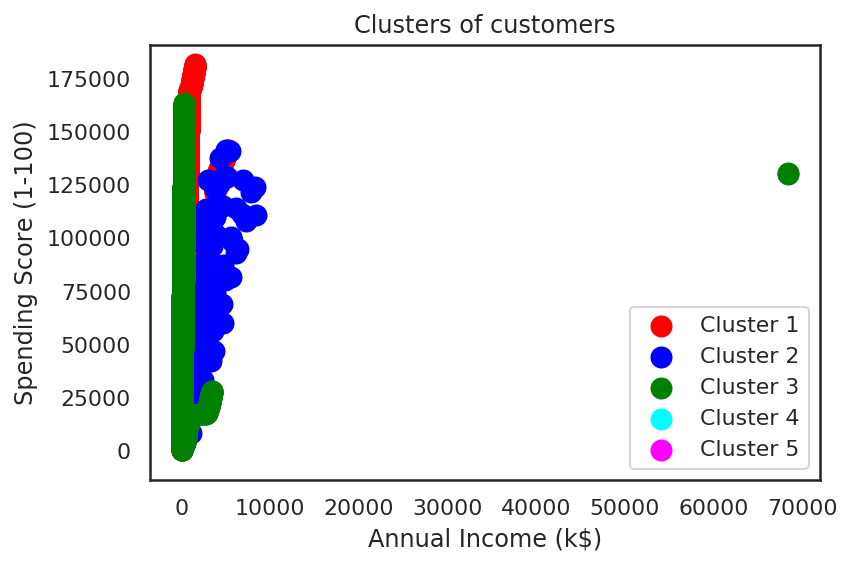

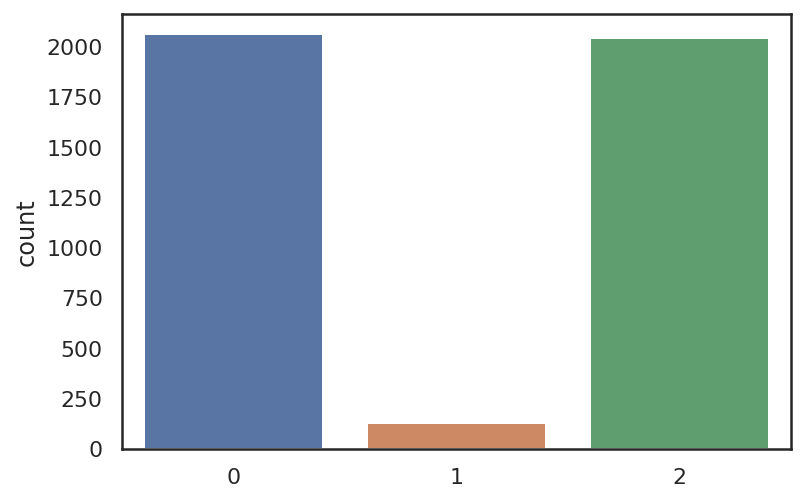

In [144]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)
data['y'] = y_kmeans
# Visualising the clusters
#s is size
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1') 
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

sb.countplot(x=y_kmeans, data=data)



In [145]:
# # Fitting Hierarchical Clustering to the dataset
# from sklearn.cluster import AgglomerativeClustering
# hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
# y_hc = hc.fit_predict(X)
# data['y_hc'] = y_hc
# # Visualising the clusters
# plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
# plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
# plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# # # plt.title('Clusters of customers')
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
# plt.legend()
# plt.show()

# sb.countplot(x=y_hc, data=data)

In [146]:
# data.groupby(data['y_kmeans'])

In [147]:
# data['y_kmeans'].unique()

In [148]:
# zero = []
# ones = []
# two = []
# for i in range(len(data)):
#     if data['y_kmeans'][i] == 0:
#         zero.append(i)
#     elif data['y_kmeans'][i] == 1:
#         ones.append(i)
#     else :
#         two.append(i)

In [149]:
# len(zero), len(ones), len(two)

In [150]:
# cluster_0 = data[data['y_hc'] == 0]
# cluster_1 = data[data['y_hc'] == 1]
# cluster_2 = data[data['y_hc'] == 2]
# cluster_3 = data[data['y_hc'] == 3]
# cluster_4 = data[data['y_hc'] == 4]

In [151]:
# for i in data.columns:
#     print(i)
#     print(cluster_0[i].min() , "-" , cluster_0[i].max())
#     print(' ')
#     print(cluster_1[i].min(), "-" ,cluster_1[i].max())

#     print(' ')

X = data.drop(columns=['y'])
y = data['y']
X.shape, y.shape

((4225, 34), (4225,))

In [152]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E', 'g', 'r']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()


1952 new random picked points


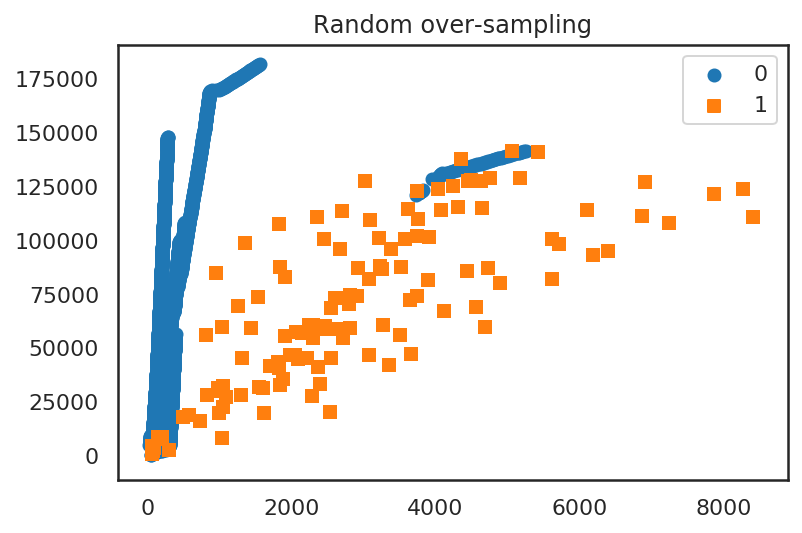

In [153]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

In [158]:
X_ros.shape
data = pd.DataFrame(X_ros)
X = data

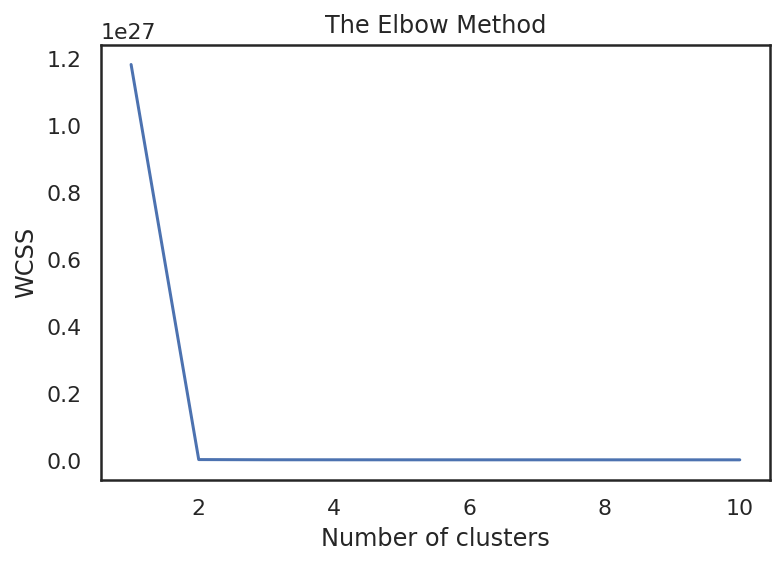

TypeError: '(array([False, False, False, ..., False, False, False]), 0)' is an invalid key

In [164]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)
data['y_kmeans'] = y_kmeans
# Visualising the clusters
#s is size
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1') 
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

sb.countplot(x=y_kmeans, data=data)



In [165]:
X

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,y,y_kmeans
0,3733.17,120971.88,31.8,20838767.0,200273168.0,0.14,0.33,0.43,1.677688e+10,6.781157e+09,...,524028.0,90269129.0,140071937.0,239706.0,432121.0,1.0,3.0,8.53,3,3
1,3767.15,121920.71,33.3,21030713.0,202313416.0,0.80,0.39,0.42,1.677688e+10,6.744269e+09,...,527724.0,90398424.0,140425748.0,240251.0,433093.0,1.0,3.0,8.57,3,3
2,3769.52,121938.45,23.8,21038802.0,202404974.0,0.73,0.39,0.42,1.677688e+10,6.746046e+09,...,527748.0,90403041.0,140430950.0,240269.0,433117.0,1.0,3.0,8.57,3,3
3,3773.42,121984.77,25.0,21054241.0,202500215.0,0.69,0.39,0.42,1.677688e+10,6.745641e+09,...,527792.0,90409865.0,140438873.0,240294.0,433158.0,1.0,3.0,8.58,3,3
4,3778.91,122102.01,25.0,21078850.0,202692540.0,0.47,0.37,0.41,1.677688e+10,6.754492e+09,...,528036.0,90423946.0,140451107.0,240349.0,433242.0,1.0,3.0,8.58,3,3
5,3790.60,122355.45,16.0,21142313.0,203447060.0,0.45,0.38,0.41,1.677688e+10,3.765494e+09,...,529640.0,90437051.0,140471479.0,240407.0,433431.0,1.0,3.0,8.59,3,3
6,3796.35,122583.72,33.3,21184738.0,203912994.0,0.42,0.40,0.42,1.677688e+10,3.763843e+09,...,530292.0,90449261.0,140489766.0,240474.0,433607.0,1.0,3.0,9.00,3,3
7,3811.23,122798.05,46.9,21250414.0,204963858.0,0.50,0.42,0.42,1.677688e+10,3.769385e+09,...,530804.0,90455082.0,140511557.0,240506.0,433800.0,1.0,3.0,9.01,3,3
8,3833.33,122999.10,60.6,21327446.0,206211025.0,0.35,0.39,0.41,1.677688e+10,3.826258e+09,...,531516.0,90486774.0,140594294.0,240652.0,434095.0,1.0,3.0,9.02,3,3
9,87.23,2664.98,25.0,473172.0,414381.0,0.75,0.61,0.53,8.284881e+09,1.439105e+09,...,199768.0,1411525.0,41278007.0,17398.0,31615.0,0.0,0.0,0.13,0,0
